<a href="https://colab.research.google.com/github/bundickm/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/Michael_Bundick_DS_U1_S5_Project_Scratchbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install --upgrade seaborn

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [0]:
games = pd.read_csv('games_all.csv').drop(['Unnamed: 0','Unnamed: 0.1','median'],axis='columns')

In [0]:
games['id'] = games['id'].astype(int)
games = games.set_index('id')

In [211]:
columns = ['name', 'owned', 'bayes_rating', 'weight', 'avg_play_time', 'age', 
 'best_with', 'lang_dependance', 'comment_count', 'honor_count', 'publish_date', 
 'best_age', 'max_play_time', 'min_play_time', 'max_players', 'min_players', 
 'rating_votes', 'weight_votes', 'trading', 'wanting', 'wishing', 'rating', 
 'std_dev','description', 'image']

games = games[columns]
games.head(1)

name   owned  bayes_rating  weight  avg_play_time  age best_with  \
id                                                                      
13  Catan  123608       7.04016  2.3412            120   10       4.0   

    lang_dependance  comment_count  honor_count  publish_date  best_age  \
id                                                                        
13              2.0          16207         13.0          1995       5.0   

    max_play_time  min_play_time  max_players  min_players  rating_votes  \
id                                                                         
13            120             60            4            3         84363   

    weight_votes  trading  wanting  wishing  rating  std_dev  \
id                                                             
13          6844     1652      451     4699  7.1943  1.46985   

                                          description  \
id                                                      
13  In Catan (formerly The Settlers of Catan), pla...   

                                                image  
id                                                     
13  https://cf.geekdo-images.com/original/img/A-0y...

In [0]:
games[['age',
       'best_age',
       'avg_play_time',
       'max_play_time',
       'min_play_time',
       'lang_dependance',
       'weight',
       'max_players',
       'min_players']] = games[['age',
                                  'best_age',
                                  'avg_play_time',
                                  'max_play_time',
                                  'min_play_time',
                                  'lang_dependance',
                                  'weight',
                                  'max_players',
                                  'min_players']].replace(0,np.NaN)
games = games[games['rating_votes'] >= 30]

In [213]:
spinoffs = []
for i in range(len(games)):
  if ((games['name'].iloc[i] == 'Clusterf**k!') or 
      (games['name'].iloc[i] == 'Wibbell++') or 
      (games['name'].iloc[i] == '*Star') or 
      (games['name'].iloc[i] == 'F**k. The game')):
    spinoffs.append(0)
  else:
    spinoffs.append((len(games[games['name'].str.contains(
                                            games['name'].iloc[i])])-1))
games['spinoffs'] = spinoffs

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  # Remove the CWD from sys.path while we load stuff.


In [0]:
games['play_time_range'] = abs(games['max_play_time']-games['min_play_time'])
games['player_range'] = games['max_players']-games['min_players']
games['best_with_dense'] = ((games['best_with'].str.replace('+',''))
                            .astype(float).astype(int))
games['best_with_dense'] = games['best_with_dense'].replace('0',np.NaN)
games['weight_rnd'] = games['weight'].round()

In [217]:
games.head()

name   owned  bayes_rating  weight  avg_play_time   age  \
id                                                                      
13           Catan  123608       7.04016  2.3412          120.0  10.0   
822    Carcassonne  120110       7.32325  1.9259           45.0   8.0   
30549     Pandemic  121076       7.54713  2.4230           45.0   8.0   
68448    7 Wonders   89740       7.69094  2.3406           30.0  10.0   
36218     Dominion   87899       7.54537  2.3632           30.0  13.0   

      best_with  lang_dependance  comment_count  honor_count  publish_date  \
id                                                                           
13          4.0              2.0          16207         13.0          1995   
822         2.0              1.0          16078         12.0          2000   
30549       4.0              2.0          13977         34.0          2008   
68448       4.0              1.0          11723         50.0          2010   
36218       3.0              3.0          12115         41.0          2008   

       best_age  max_play_time  min_play_time  max_players  min_players  \
id                                                                        
13          5.0          120.0           60.0          4.0          3.0   
822         5.0           45.0           30.0          5.0          2.0   
30549       6.0           45.0           45.0          4.0          2.0   
68448       6.0           30.0           30.0          7.0          2.0   
36218       6.0           30.0           30.0          4.0          2.0   

       rating_votes  weight_votes  trading  wanting  wishing   rating  \
id                                                                      
13            84363          6844     1652      451     4699  7.19430   
822           84045          6924     1461      498     5337  7.42741   
30549         82331          4854     1935      622     7610  7.64064   
68448         68249          3984     1144     1025     9407  7.78348   
36218         67698          4669     1791      564     6621  7.64685   

       std_dev                                        description  \
id                                                                  
13     1.46985  In Catan (formerly The Settlers of Catan), pla...   
822    1.30276  Carcassonne is a tile-placement game in which ...   
30549  1.32187  In Pandemic, several virulent diseases have br...   
68448  1.27550  You are the leader of one of the 7 great citie...   
36218  1.42680  (from the back of the box:)<br/><br/>&quot;You...   

                                                   image  spinoffs  \
id                                                                   
13     https://cf.geekdo-images.com/original/img/A-0y...        31   
822    https://cf.geekdo-images.com/original/img/o4p6...        25   
30549  https://cf.geekdo-images.com/original/img/j-pf...         8   
68448  https://cf.geekdo-images.com/original/img/3DP_...         1   
36218  https://cf.geekdo-images.com/original/img/oN8C...         8   

       play_time_range  player_range  best_with_dense  weight_rnd  
id                                                                 
13                60.0           1.0                4         2.0  
822               15.0           3.0                2         2.0  
30549              0.0           2.0                4         2.0  
68448              0.0           5.0                4         2.0  
36218              0.0           2.0                3         2.0

In [208]:
type(games['weight_rnd'].iloc[0])

numpy.float64

In [9]:
games.describe()

owned  bayes_rating        weight  avg_play_time           age  \
count   17168.000000  17168.000000  16857.000000   16735.000000  16043.000000   
mean     1254.187733      5.700732      2.045228      99.703615     10.204014   
std      4234.644828      0.381683      0.802993    1093.475337      2.721674   
min         3.000000      3.465090      1.000000       1.000000      1.000000   
25%       143.000000      5.511828      1.368400      30.000000      8.000000   
50%       298.000000      5.556935      2.000000      45.000000     10.000000   
75%       804.250000      5.706898      2.583300      90.000000     12.000000   
max    123608.000000      8.611030      5.000000  120000.000000     25.000000   

       lang_dependance  comment_count   honor_count  publish_date  \
count     12126.000000   17168.000000  17168.000000  17168.000000   
mean          2.048326     202.547880      0.493418   1983.910123   
std           1.221312     609.012033      1.697302    207.195949   
min           1.000000       1.000000      0.000000  -3500.000000   
25%           1.000000      24.000000      0.000000   1999.000000   
50%           2.000000      50.000000      0.000000   2009.000000   
75%           3.000000     133.000000      0.000000   2015.000000   
max           5.000000   16207.000000     50.000000   2020.000000   

          best_age  max_play_time  min_play_time   max_players   min_players  \
count  12183.00000   16657.000000   16720.000000  16987.000000  17102.000000   
mean       5.70229      99.995257      72.398026      5.601401      2.048181   
std        1.71455    1096.022936     509.489871     15.832166      0.667624   
min        1.00000       1.000000       1.000000      1.000000      1.000000   
25%        5.00000      30.000000      20.000000      4.000000      2.000000   
50%        6.00000      45.000000      40.000000      4.000000      2.000000   
75%        7.00000      90.000000      60.000000      6.000000      2.000000   
max       11.00000  120000.000000   60000.000000    999.000000     10.000000   

       rating_votes  weight_votes       trading       wanting       wishing  \
count  17168.000000  17168.000000  17168.000000  17168.000000  17168.000000   
mean     767.870573     52.786172     42.100944     42.775047    195.281454   
std     3033.164942    206.021538     93.456338    118.737475    632.689892   
min       30.000000      0.000000      0.000000      0.000000      0.000000   
25%       55.000000      5.000000      5.000000      3.000000     12.000000   
50%      118.000000     10.000000     14.000000      9.000000     34.000000   
75%      371.000000     29.000000     39.000000     29.000000    113.000000   
max    84363.000000   6924.000000   2223.000000   2080.000000  13136.000000   

             rating       std_dev      spinoffs  play_time_range  \
count  17168.000000  17168.000000  17168.000000     16642.000000   
mean       6.362220      1.507242      3.166473        27.479389   
std        0.917319      0.277478    183.412004       963.422456   
min        1.052540      0.219673     -1.000000         0.000000   
25%        5.785507      1.316905      0.000000         0.000000   
50%        6.392880      1.470580      0.000000         0.000000   
75%        6.971192      1.649275      0.000000         0.000000   
max        9.597140      4.068800  16582.000000    119880.000000   

       player_range  best_with_dense  
count  16977.000000     17168.000000  
mean       3.557107         2.670608  
std       15.797476         1.806545  
min        0.000000         0.000000  
25%        1.000000         2.000000  
50%        2.000000         2.000000  
75%        4.000000         4.000000  
max      997.000000        31.000000

In [14]:
games[games['bayes_rating']==8.611030]

name  bayes_rating  weight  avg_play_time   age best_with  \
id                                                                        
174430  Gloomhaven       8.61103  3.7847          120.0  12.0       3.0   

        lang_dependance  comment_count  honor_count  publish_date  best_age  \
id                                                                            
174430              4.0           4790         23.0          2017       8.0   

        max_play_time  min_play_time  max_players  min_players  rating_votes  \
id                                                                             
174430          120.0           60.0            4            1         24157   

        weight_votes  owned  trading  wanting  wishing   rating  median  \
id                                                                        
174430          1036  39758      205     1339    11932  8.90602       0   

        std_dev                                        description  \
id                                                                   
174430  1.60633  Gloomhaven  is a game of Euro-inspired tactica...   

                                                    image  
id                                                         
174430  https://cf.geekdo-images.com/original/img/lDN3...

In [15]:
games[games['name'].str.contains('Twilight Imperium')]

name  bayes_rating  weight  \
id                                                                 
12493    Twilight Imperium (Third Edition)       7.64142  4.2478   
233078  Twilight Imperium (Fourth Edition)       8.06701  4.1783   
24                       Twilight Imperium       5.87686  3.4902   
26055   Twilight Imperium (Second Edition)       5.89056  3.4894   
2902             Twilight Imperium: Armada       5.59059  2.7500   

        avg_play_time   age best_with  lang_dependance  comment_count  \
id                                                                      
12493           240.0  14.0       6.0              4.0           4176   
233078          480.0  14.0       6.0              4.0           1064   
24              240.0  12.0         4              NaN            292   
26055           240.0  12.0         6              4.0            144   
2902             45.0  12.0       2.0              NaN             49   

        honor_count  publish_date  best_age  max_play_time  min_play_time  \
id                                                                          
12493           2.0          2005       8.0          240.0          180.0   
233078          2.0          2017       8.0          480.0          240.0   
24              0.0          1997       NaN          240.0          240.0   
26055           0.0          2000       NaN          240.0          240.0   
2902            0.0          2001       NaN           45.0           45.0   

        max_players  min_players  rating_votes  weight_votes  owned  trading  \
id                                                                             
12493             6            3         17177          2010  19170      636   
233078            6            3          6325           286   8764       37   
24                6            2           685            51    831       55   
26055             6            2           502            47    824       57   
2902              6            2           107            12    243       23   

        wanting  wishing   rating  median  std_dev  \
id                                                   
12493       741     4842  7.87230       0  1.69491   
233078      722     4769  8.73455       0  1.56463   
24           32       87  6.65494       0  1.65401   
26055        17       48  6.92175       0  1.47822   
2902         42       52  6.79776       0  1.37881   

                                              description  \
id                                                          
12493   Twilight Imperium Third Edition is an epic emp...   
233078  Twilight Imperium (Fourth Edition) is a game o...   
24      Sprawling game of space faring races out to do...   
26055   Twilight Imperium is a unique boardgame that a...   
2902    The galaxy is engulfed in terrible conflict. F...   

                                                    image  
id                                                         
12493   https://cf.geekdo-images.com/original/img/60Yj...  
233078  https://cf.geekdo-images.com/original/img/Xe0Y...  
24      https://cf.geekdo-images.com/original/img/COM3...  
26055   https://cf.geekdo-images.com/original/img/cRqC...  
2902    https://cf.geekdo-images.com/original/img/3TTT...

In [0]:
rating_bins = pd.cut(games['bayes_rating'],15)
age_bins = pd.cut(games[games['age']<=18]['age'],5)
playtime_bins = pd.cut(games[games['avg_play_time']<240]['avg_play_time'],5)
weight_bins = pd.cut(games['weight'],5)

In [17]:
games['age'].value_counts()

12.0    4208
8.0     3405
10.0    3313
14.0    1238
13.0     974
6.0      742
7.0      655
5.0      366
9.0      295
4.0      219
18.0     142
15.0     127
16.0     122
3.0      101
11.0      83
17.0      38
2.0        9
21.0       8
25.0       1
1.0        1
Name: age, dtype: int64

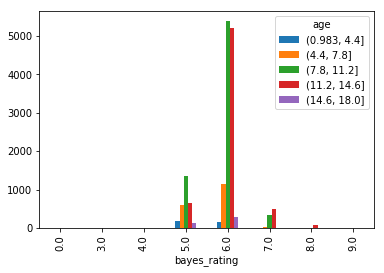

In [18]:
pd.crosstab(age_bins,games['bayes_rating'].round()).T.plot.bar();

In [19]:
pd.crosstab(rating_bins,playtime_bins)

avg_play_time      (0.779, 45.2]  (45.2, 89.4]  (89.4, 133.6]  (133.6, 177.8]  \
bayes_rating                                                                    
(-0.00861, 0.574]              3             1              1               0   
(3.444, 4.018]                 4             1              0               0   
(4.018, 4.593]                 6             1              0               0   
(4.593, 5.167]                42             6              4               0   
(5.167, 5.741]              7405          2040           1892              73   
(5.741, 6.315]              1182           507            531              24   
(6.315, 6.889]               337           197            197              14   
(6.889, 7.463]                99            89            122               6   
(7.463, 8.037]                15             8             42               7   
(8.037, 8.611]                 0             1              4               3   

avg_play_time      (177.8, 222.0]  
bayes_rating                       
(-0.00861, 0.574]               0  
(3.444, 4.018]                  0  
(4.018, 4.593]                  1  
(4.593, 5.167]                  0  
(5.167, 5.741]                502  
(5.741, 6.315]                128  
(6.315, 6.889]                 44  
(6.889, 7.463]                 33  
(7.463, 8.037]                  6  
(8.037, 8.611]                  1

In [20]:
games['avg_play_time'].value_counts()[:10]

30.0     3139
60.0     2539
45.0     1810
20.0     1697
120.0    1399
90.0     1341
15.0      984
180.0     690
10.0      670
Name: avg_play_time, dtype: int64

In [21]:
pd.crosstab(games['bayes_rating'].round(),games['lang_dependance'],normalize='columns')

lang_dependance       1.0       2.0       3.0       4.0       5.0
bayes_rating                                                     
0.0              0.000172  0.000000  0.000000  0.000000  0.000000
3.0              0.000172  0.000000  0.000000  0.000000  0.000000
4.0              0.001204  0.000000  0.001014  0.000000  0.000000
5.0              0.149811  0.142436  0.118094  0.133559  0.302846
6.0              0.784658  0.791403  0.772428  0.753898  0.650407
7.0              0.058824  0.063211  0.099341  0.095593  0.040650
8.0              0.005160  0.002950  0.009123  0.016271  0.006098
9.0              0.000000  0.000000  0.000000  0.000678  0.000000

In [22]:
pd.pivot_table(games, values='rating_votes', columns=rating_bins, index=weight_bins, fill_value=0)

bayes_rating   (-0.00861, 0.574]  (3.444, 4.018]  (4.018, 4.593]  \
weight                                                             
(-0.005, 1.0]                 24         1137.00            0.00   
(1.0, 2.0]                    29         2758.25         5493.75   
(2.0, 3.0]                    29            0.00            0.00   
(3.0, 4.0]                     0            0.00            0.00   
(4.0, 5.0]                     0            0.00            0.00   

bayes_rating   (4.593, 5.167]  (5.167, 5.741]  (5.741, 6.315]  (6.315, 6.889]  \
weight                                                                          
(-0.005, 1.0]        0.000000       71.792240      484.181818        0.000000   
(1.0, 2.0]        1581.019231      190.005179     1323.279208     5280.493506   
(2.0, 3.0]           0.000000      140.194475      863.205033     3000.887560   
(3.0, 4.0]           0.000000      105.254902      585.028640     2111.205882   
(4.0, 5.0]           0.000000       92.861314      419.633803     1235.550000   

bayes_rating   (6.889, 7.463]  (7.463, 8.037]  (8.037, 8.611]  
weight                                                         
(-0.005, 1.0]        0.000000        0.000000               0  
(1.0, 2.0]       16362.416667    24078.857143               0  
(2.0, 3.0]        9537.017045    25314.481481           30703  
(3.0, 4.0]        6540.000000    18586.250000           28852  
(4.0, 5.0]        3277.800000    12041.111111           10208

In [23]:
games[games['weight'] >= 4].describe()

bayes_rating      weight  avg_play_time         age  lang_dependance  \
count    326.000000  326.000000     313.000000  290.000000       213.000000   
mean       5.890114    4.237267    1354.217252   12.693103         2.737089   
std        0.557571    0.222600    7791.748128    1.252936         1.279882   
min        5.401420    4.000000      20.000000    9.000000         1.000000   
25%        5.569320    4.043450     180.000000   12.000000         2.000000   
50%        5.644920    4.200000     300.000000   12.000000         3.000000   
75%        5.936740    4.361975     360.000000   14.000000         4.000000   
max        8.258050    5.000000  120000.000000   17.000000         5.000000   

       comment_count  honor_count  publish_date    best_age  max_play_time  \
count     326.000000   326.000000    326.000000  243.000000     311.000000   
mean      238.107362     0.880368   2002.880368    8.078189    1362.540193   
std       548.737940     1.704595     13.272799    0.934894    7816.146686   
min         1.000000     0.000000   1936.000000    5.000000      20.000000   
25%        32.000000     0.000000   1994.250000    8.000000     180.000000   
50%        65.000000     0.000000   2005.000000    8.000000     300.000000   
75%       160.750000     1.000000   2015.000000    9.000000     360.000000   
max      4896.000000    11.000000   2019.000000   11.000000  120000.000000   

       min_play_time  max_players  min_players  rating_votes  weight_votes  \
count     313.000000   326.000000   326.000000    326.000000    326.000000   
mean      600.814696     4.760736     1.822086    808.806748     85.223926   
std      3514.290933     7.754966     0.664902   2493.400434    228.498609   
min        10.000000     0.000000     0.000000     30.000000      1.000000   
25%       120.000000     2.000000     1.000000     56.000000      9.000000   
50%       180.000000     4.000000     2.000000    124.000000     19.000000   
75%       360.000000     6.000000     2.000000    325.000000     57.750000   
max     60000.000000    99.000000     8.000000  23305.000000   2100.000000   

              owned     trading      wanting      wishing      rating  median  \
count    326.000000  326.000000   326.000000   326.000000  326.000000   326.0   
mean    1396.567485   36.904908   100.392638   434.714724    7.447080     0.0   
std     3215.465552   88.247625   205.408799  1084.109635    0.792893     0.0   
min        7.000000    0.000000     0.000000     1.000000    3.596830     0.0   
25%      187.250000    5.000000    13.000000    34.000000    7.014050     0.0   
50%      398.000000   11.000000    32.000000    79.500000    7.487275     0.0   
75%      998.750000   33.750000    74.750000   218.250000    7.993468     0.0   
max    34039.000000  857.000000  1360.000000  9022.000000    9.230340     0.0   

          std_dev  
count  326.000000  
mean     1.655160  
std      0.316816  
min      0.836193  
25%      1.454450  
50%      1.613400  
75%      1.797958  
max      3.500490

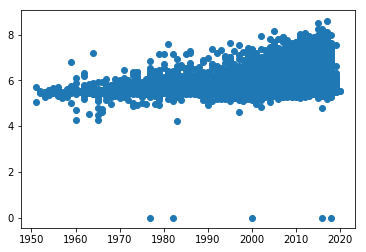

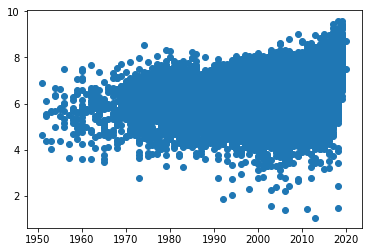

In [26]:
plt.scatter(games[games['publish_date']>1950]['publish_date'], games[games['publish_date']>1950]['bayes_rating']);
plt.show()
plt.scatter(games[games['publish_date']>1950]['publish_date'], games[games['publish_date']>1950]['rating']);

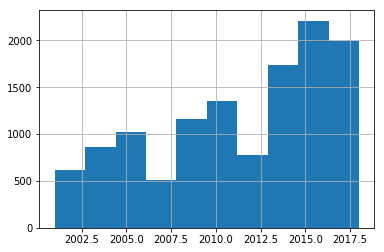

In [86]:
games[(games['publish_date']>2000) & (games['publish_date']<2019)]['publish_date'].hist();

In [42]:
games[(games['publish_date']>2000) & (games['publish_date']<2019)]['publish_date'].value_counts().sort_index()

2001     294
2002     322
2003     395
2004     472
2005     524
2006     494
2007     515
2008     556
2009     602
2010     660
2011     689
2012     780
2013     806
2014     929
2015    1065
2016    1144
2017    1091
2018     900
Name: publish_date, dtype: int64

In [0]:
games[games['publish_date']>1950]['publish_date'].value_counts()

In [104]:
pd.crosstab(rating_bins,games[(games['publish_date']>2000) & (games['publish_date']<2019)]['publish_date'], normalize='columns')

publish_date           2001      2002      2003      2004      2005      2006  \
bayes_rating                                                                    
(-0.00861, 0.574]  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
(4.593, 5.167]     0.003401  0.006211  0.000000  0.002119  0.000000  0.000000   
(5.167, 5.741]     0.809524  0.770186  0.784810  0.781780  0.790076  0.795547   
(5.741, 6.315]     0.136054  0.177019  0.164557  0.133475  0.129771  0.143725   
(6.315, 6.889]     0.044218  0.027950  0.040506  0.050847  0.051527  0.034413   
(6.889, 7.463]     0.006803  0.015528  0.010127  0.027542  0.022901  0.024291   
(7.463, 8.037]     0.000000  0.003106  0.000000  0.004237  0.003817  0.002024   
(8.037, 8.611]     0.000000  0.000000  0.000000  0.000000  0.001908  0.000000   

publish_date           2007      2008      2009      2010      2011      2012  \
bayes_rating                                                                    
(-0.00861, 0.574]  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
(4.593, 5.167]     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
(5.167, 5.741]     0.763107  0.742806  0.729236  0.730303  0.724238  0.707692   
(5.741, 6.315]     0.157282  0.174460  0.174419  0.174242  0.165457  0.185897   
(6.315, 6.889]     0.040777  0.062950  0.056478  0.062121  0.063861  0.057692   
(6.889, 7.463]     0.033010  0.010791  0.038206  0.028788  0.037736  0.035897   
(7.463, 8.037]     0.005825  0.008993  0.001661  0.004545  0.008708  0.011538   
(8.037, 8.611]     0.000000  0.000000  0.000000  0.000000  0.000000  0.001282   

publish_date           2013      2014      2015      2016      2017      2018  
bayes_rating                                                                   
(-0.00861, 0.574]  0.000000  0.000000  0.000000  0.000874  0.000000  0.001111  
(4.593, 5.167]     0.000000  0.000000  0.000000  0.000874  0.000000  0.000000  
(5.167, 5.741]     0.720844  0.727664  0.692019  0.713287  0.692026  0.723333  
(5.741, 6.315]     0.181141  0.152853  0.188732  0.184441  0.196150  0.195556  
(6.315, 6.889]     0.064516  0.076426  0.071362  0.062063  0.073327  0.056667  
(6.889, 7.463]     0.028536  0.029064  0.033803  0.027098  0.029331  0.020000  
(7.463, 8.037]     0.004963  0.013994  0.012207  0.007867  0.006416  0.003333  
(8.037, 8.611]     0.000000  0.000000  0.001878  0.003497  0.002750  0.000000

In [95]:
games[(games['publish_date']==2015)].sort_values(by=['bayes_rating'], ascending=False)

name  bayes_rating  \
id                                                                        
161936                          Pandemic Legacy: Season 1       8.49151   
182028      Through the Ages: A New Story of Civilization       8.25805   
173346                                     7 Wonders Duel       7.99170   
183394                      Viticulture Essential Edition       7.92746   
175914                                 Food Chain Magnate       7.84997   
170216                                         Blood Rage       7.84952   
55690                              Kingdom Death: Monster       7.80828   
171623                          The Voyages of Marco Polo       7.73091   
178900                                          Codenames       7.62756   
125153                                      The Gallerist       7.60035   
172386                                            Mombasa       7.59637   
146508                                    T.I.M.E Stories       7.57687   
175155                                    Forbidden Stars       7.49512   
170042                           Raiders of the North Sea       7.48010   
172287                               Champions of Midgard       7.46340   
182874                                Grand Austria Hotel       7.45283   
176189                            Zombicide: Black Plague       7.36047   
163068                    Trickerion: Legends of Illusion       7.31669   
182631                           Star Realms: Colony Wars       7.31450   
176494               Isle of Skye: From Chieftain to King       7.29299   
181304                                          Mysterium       7.25650   
172818                                    Above and Below       7.25505   
181279             Fury of Dracula (third/fourth edition)       7.25091   
172081                                       Burgle Bros.       7.23127   
163745                                  Star Wars: Armada       7.21373   
176920               Mission: Red Planet (Second Edition)       7.20142   
139976                                       Cthulhu Wars       7.16970   
163967                                 Tiny Epic Galaxies       7.16952   
154809                                             Nippon       7.12563   
171908                                  El Grande Big Box       7.12429   
140934                                          Arboretum       7.10266   
183562  Star Wars: X-Wing Miniatures Game – The Force ...       7.07710   
161614                                          Stockpile       7.05753   
171668                                       The Grizzled       7.04698   
177639                                             Raptor       7.04182   
163968                                            Elysium       7.00744   
171905                            Orléans: Deluxe Edition       7.00699   
169255  A Game of Thrones: The Card Game (Second Edition)       6.99667   
181530                          Runebound (Third Edition)       6.95238   
151022                          Baseball Highlights: 2045       6.94899   
180974                                   Potion Explosion       6.94280   
183251                                             Karuba       6.94136   
156546                                           Monikers       6.93897   
163166               One Night Ultimate Werewolf Daybreak       6.93820   
144797                             Argent: The Consortium       6.93726   
181521           Warhammer Quest: The Adventure Card Game       6.93567   
130960                                  Triumph & Tragedy       6.93243   
172308                                      Broom Service       6.92479   
155624                                        Specter Ops       6.90263   
167400                     Ashes: Rise of the Phoenixborn       6.89899   
180511                                        Shakespeare       6.89686   
162007                                    Steampunk Rally       6.88169   
168

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


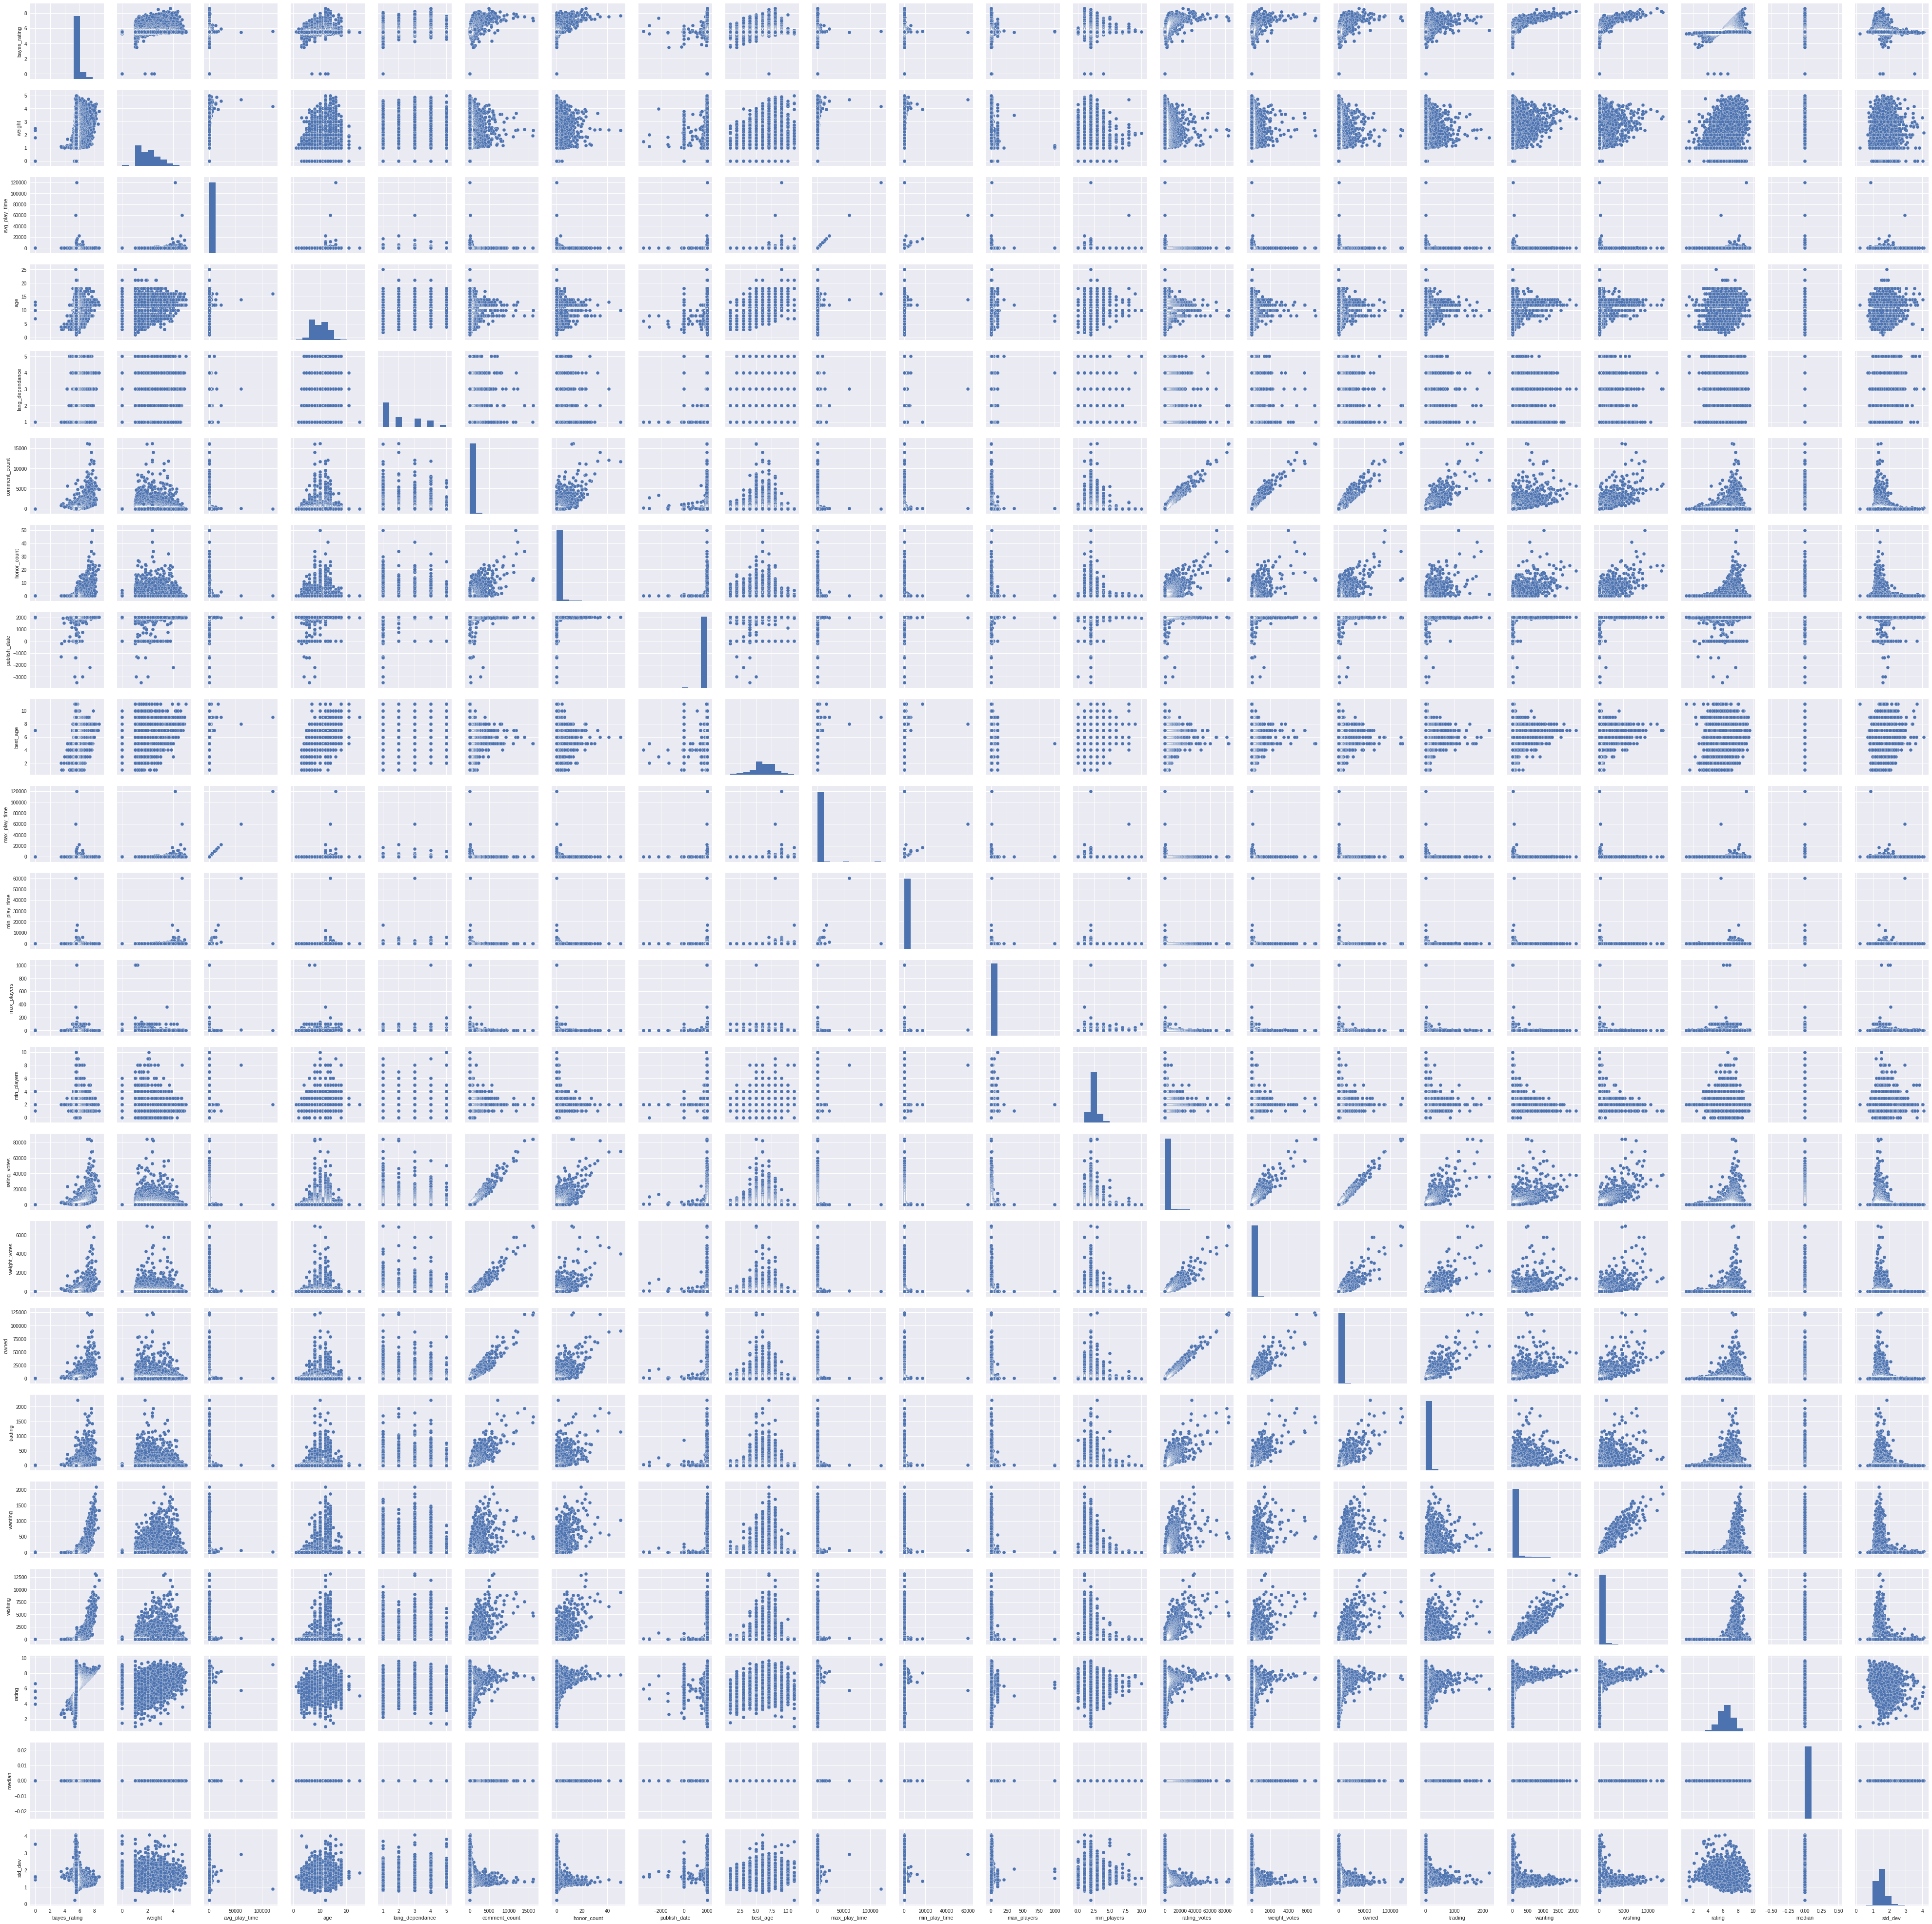

In [137]:
sns.pairplot(games, kind='reg');

In [0]:
most_popular = games.sort_values(by=['owned'],ascending=False).head(858)

In [0]:
most_popular.head()

In [0]:
most_popular[most_popular['publish_date'] > 1990].describe()

In [0]:
most_popular[(most_popular['max_play_time'] > 120) & (most_popular['publish_date'] > 1990)]

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


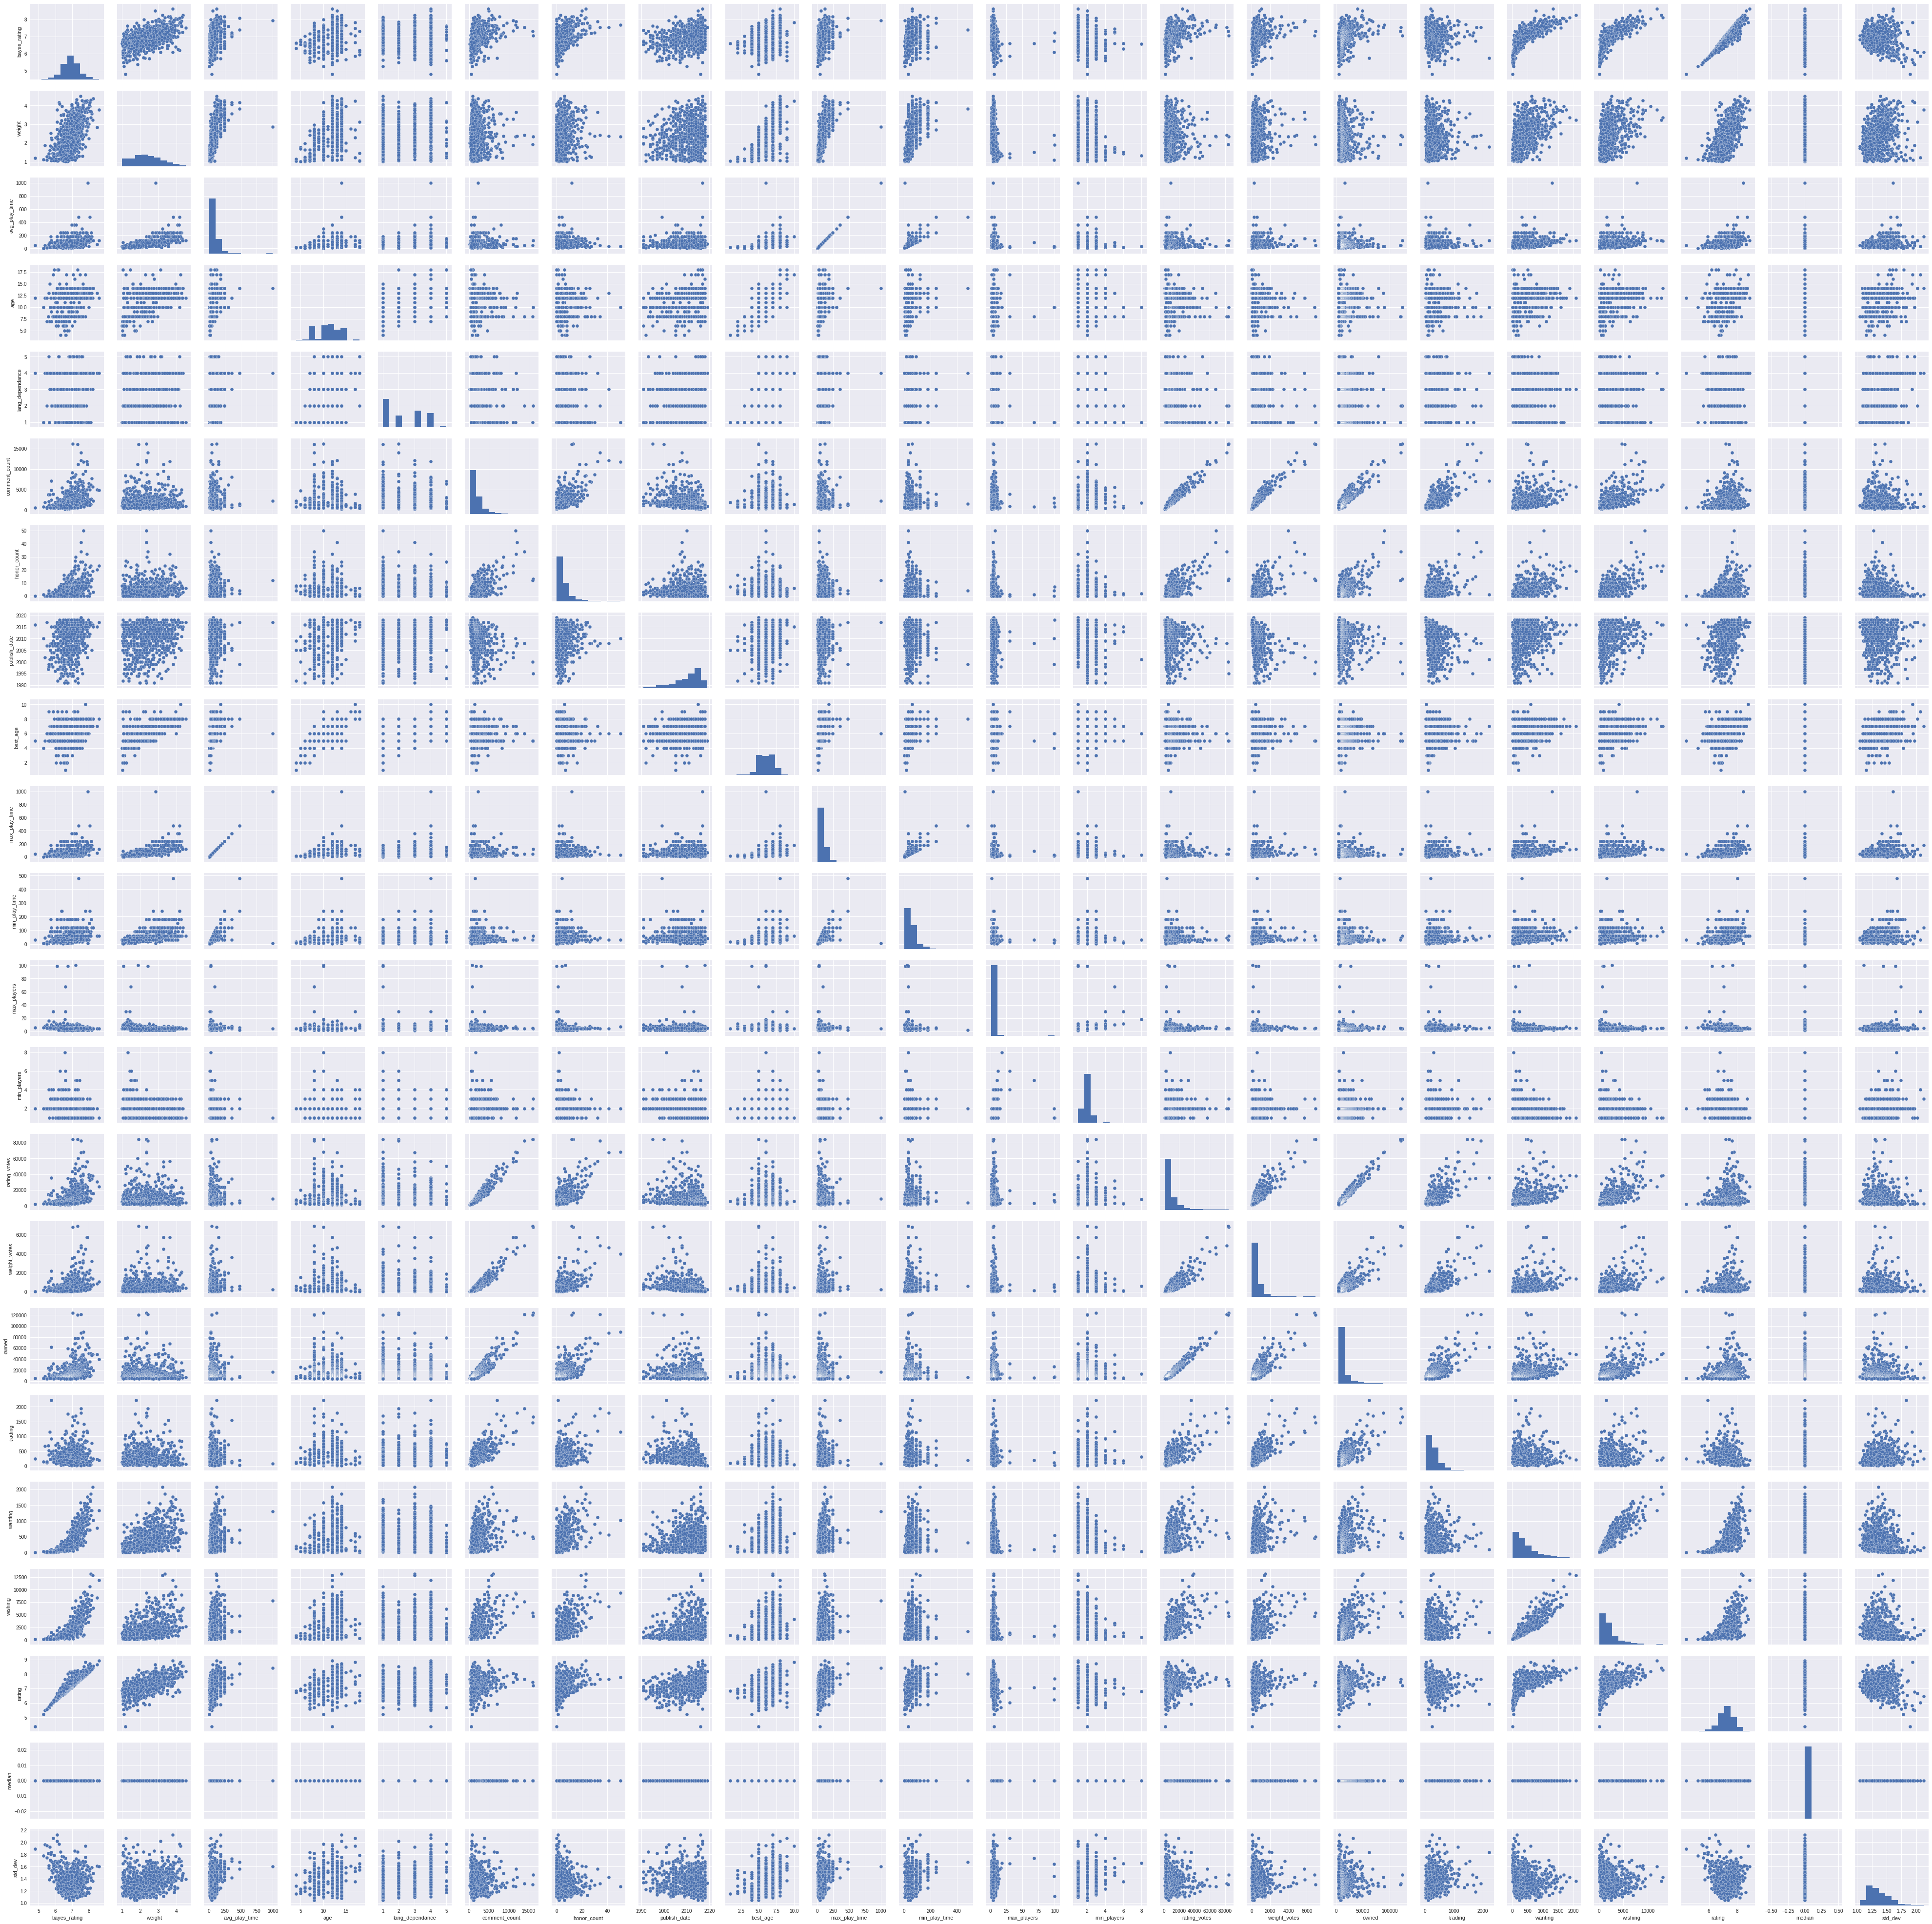

In [77]:
sns.pairplot(most_popular[most_popular['publish_date'] > 1990])

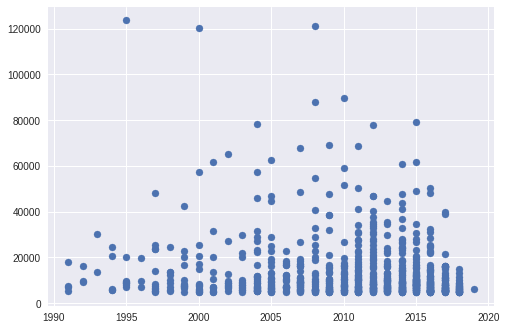

In [85]:
plt.scatter(most_popular[most_popular['publish_date'] > 1990]['publish_date'],most_popular[most_popular['publish_date'] > 1990]['owned'])

In [0]:
most_popular.groupby('publish_date')['owned'].sum()

In [11]:
nineties = most_popular[most_popular['publish_date'] > 1990]
nineties[nineties['name'].str.contains('Catan')]

name   owned  bayes_rating  weight  avg_play_time  \
id                                                                         
13                    Catan  123608       7.04016  2.3412          120.0   
278         Catan Card Game   19650       6.58345  2.4547           90.0   
66056      Rivals for Catan   10182       6.65974  2.3239          120.0   
27710       Catan Dice Game    9136       5.62093  1.2364           15.0   
117985     Star Trek: Catan    7123       6.51688  2.3770           75.0   
1897    Starfarers of Catan    6570       6.49728  2.5800          120.0   
2338         Starship Catan    6398       6.51934  2.4688           60.0   
91534    Struggle for Catan    4771       5.90627  1.6716           30.0   

         age best_with  lang_dependance  comment_count  honor_count  \
id                                                                    
13      10.0       4.0              2.0          16207         13.0   
278     10.0       2.0              4.0           3075          3.0   
66056   10.0         2              3.0           1044          0.0   
27710    7.0         2              1.0           1204          0.0   
117985  10.0         4              2.0            685          0.0   
1897    12.0         4              3.0           1440          1.0   
2338    12.0         2              3.0           1239          2.0   
91534   10.0       4.0              3.0            491          2.0   

        publish_date  best_age  max_play_time  min_play_time  max_players  \
id                                                                          
13              1995       5.0          120.0           60.0          4.0   
278             1996       7.0           90.0           90.0          2.0   
66056           2010       6.0          120.0           45.0          2.0   
27710           2007       5.0           15.0           15.0          4.0   
117985          2012       5.0           75.0           75.0          4.0   
1897            1999       6.0          120.0          120.0          4.0   
2338            2001       6.0           60.0           60.0          2.0   
91534           2011       5.0           30.0           30.0          4.0   

        min_players  rating_votes  weight_votes  trading  wanting  wishing  \
id                                                                           
13              3.0         84363          6844     1652      451     4699   
278             2.0         12086          1082      855       70      410   
66056           2.0          4798           247      360      114      722   
27710           1.0          4366           368      390       25      174   
117985          3.0          2804           122      183      124      665   
1897            3.0          4712           431      248      243      725   
2338            2.0          4069           369      210      216      637   
91534           2.0          2032           134      253       19      102   

         rating  std_dev                                        description  \
id                                                                            
13      7.19430  1.46985  In Catan (formerly The Settlers of Catan), pla...   
278     6.74320  1.40585  Catan Card Game bears only a slight resemblanc...   
66056   7.01398  1.35792  The Rivals for Catan is a reimplementation of ...   
27710   5.69287  1.38986  Like all the other games of the &quot;Settlers...   
117985  7.03120  1.33889  Settling the Final Frontier<br/><br/>Since 196...   
1897    6.81169  1.46869  The foray into space, sometime near the year 2...   
2338    6.84794  1.31908  Starship Catan is a two-player card game that ...   
91534   6.19997  1.35122  In 2010, designer Klaus Teuber overhauled the ...   

                                                    image  spinoffs  \
id                                                                    
13      https://cf.geekdo-images.com/original/img/A-0y...        3

In [93]:
nineties['publish_date'].value_counts().sort_index()

1991     4
1992     3
1993     2
1994     5
1995     8
1996     3
1997    12
1998     9
1999    12
2000    14
2001    11
2002    11
2003    13
2004    29
2005    31
2006    19
2007    35
2008    28
2009    38
2010    34
2011    54
2012    57
2013    45
2014    67
2015    76
2016    73
2017    56
2018    28
2019     1
Name: publish_date, dtype: int64

In [94]:
nineties.columns

Index(['name', 'bayes_rating', 'weight', 'avg_play_time', 'age', 'best_with',
       'lang_dependance', 'comment_count', 'honor_count', 'publish_date',
       'best_age', 'max_play_time', 'min_play_time', 'max_players',
       'min_players', 'rating_votes', 'weight_votes', 'owned', 'trading',
       'wanting', 'wishing', 'rating', 'median', 'std_dev', 'description',
       'image'],
      dtype='object')

In [95]:
nineties['best_with'].value_counts().sort_index()

1         9
1.0       7
12.0      1
14        1
15        1
2        85
2+        6
2.0      84
3        41
3.0      77
4       144
4.0     195
5        24
5.0      50
6        13
6.0      25
7         2
7.0       8
8         1
8.0       4
Name: best_with, dtype: int64

In [96]:
nineties['max_players'].value_counts().sort_index()

1        2
2       91
3        2
4      307
5      178
6      107
7       14
8       47
9        1
10      13
12       6
13       1
15       1
16       1
18       1
30       2
68       1
99       2
100      1
Name: max_players, dtype: int64

In [97]:
nineties['min_players'].value_counts().sort_index()

1    153
2    526
3     79
4     13
5      4
6      2
8      1
Name: min_players, dtype: int64

In [98]:
(nineties['max_players']-nineties['min_players']).value_counts().sort_index()

0      85
1      20
2     254
3     214
4     106
5      34
6      31
7      13
8       8
9       1
10      1
11      3
12      1
13      1
24      1
26      1
63      1
97      1
98      1
99      1
dtype: int64

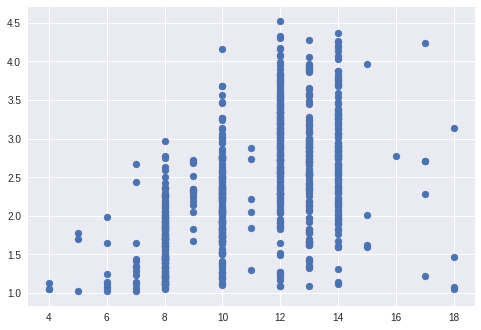

In [99]:
plt.scatter(nineties['age'],nineties['weight'])

In [67]:
nineties['age'].value_counts().sort_index()

4.0       3
5.0       3
6.0       8
7.0      13
8.0     137
9.0      16
10.0    160
11.0      6
12.0    173
13.0    116
14.0    129
15.0      4
16.0      1
17.0      5
18.0      4
Name: age, dtype: int64

In [101]:
nineties.describe()

bayes_rating      weight  avg_play_time         age  lang_dependance  \
count    778.000000  778.000000     778.000000  778.000000       778.000000   
mean       6.904196    2.390643      77.584833   11.176093         2.286632   
std        0.506936    0.783250      67.733759    2.368518         1.227674   
min        4.792580    1.023300       2.000000    4.000000         1.000000   
25%        6.590753    1.796825      30.000000   10.000000         1.000000   
50%        6.907140    2.337850      60.000000   12.000000         2.000000   
75%        7.229650    2.912250     100.000000   13.000000         3.000000   
max        8.611030    4.516100    1000.000000   18.000000         5.000000   

       comment_count  honor_count  publish_date    best_age  max_play_time  \
count     778.000000   778.000000    778.000000  777.000000     777.000000   
mean     2027.723650     4.744216   2010.244216    6.083655      77.607465   
std      1898.783053     5.406762      6.058021    1.210756      67.774445   
min       184.000000     0.000000   1991.000000    1.000000       2.000000   
25%       904.250000     1.000000   2007.000000    5.000000      30.000000   
50%      1420.000000     3.000000   2012.000000    6.000000      60.000000   
75%      2409.500000     6.000000   2015.000000    7.000000     100.000000   
max     16207.000000    50.000000   2019.000000   10.000000    1000.000000   

       min_play_time  max_players  min_players  rating_votes  weight_votes  \
count     778.000000   778.000000   778.000000    778.000000    778.000000   
mean       55.268638     5.299486     1.971722   9681.254499    574.059126   
std        41.484562     6.681504     0.706085  10300.200354    746.875547   
min         1.000000     1.000000     1.000000   1367.000000     13.000000   
25%        30.000000     4.000000     2.000000   3904.000000    157.250000   
50%        45.000000     4.000000     2.000000   6170.500000    352.000000   
75%        60.000000     6.000000     2.000000  11181.000000    698.500000   
max       480.000000   100.000000     8.000000  84363.000000   6924.000000   

               owned      trading      wanting       wishing      rating  \
count     778.000000   778.000000   778.000000    778.000000  778.000000   
mean    13896.043702   311.014139   409.465296   2179.542416    7.236976   
std     14000.250842   263.991593   338.364173   1951.295194    0.547474   
min      4771.000000    21.000000     7.000000     85.000000    4.385010   
25%      6333.000000   147.000000   162.000000    856.250000    6.914200   
50%      8904.500000   242.500000   314.500000   1573.000000    7.265735   
75%     15809.750000   381.500000   565.500000   2752.500000    7.588762   
max    123608.000000  2223.000000  2080.000000  13136.000000    8.906020   

       median     std_dev  
count   778.0  778.000000  
mean      0.0    1.359516  
std       0.0    0.174717  
min       0.0    1.047930  
25%       0.0    1.229445  
50%       0.0    1.330990  
75%       0.0    1.469585  
max       0.0    2.123380

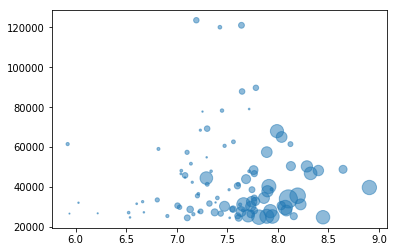

In [105]:
# plt.scatter(x=games['rating'],y=games['owned'],s=games['weight']**3.5)
plt.scatter(x=nineties[0:100]['rating'],y=nineties[0:100]['owned'],s=nineties[0:100]['weight']**4, alpha=.5)

In [195]:
nineties['weight'].round().value_counts()

2.0    328
3.0    259
1.0    114
4.0     76
5.0      1
Name: weight, dtype: int64